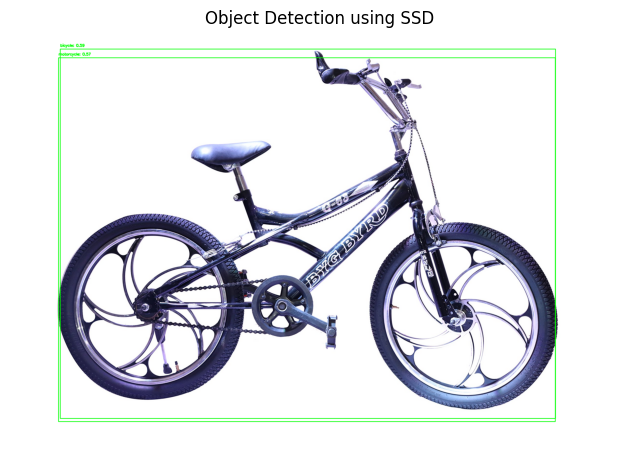

In [3]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the SSD300 model
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
model.eval()

# COCO labels
COCO_LABELS = ["__background__", "person", "bicycle", "car", "motorcycle", "airplane", "bus",
               "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign",
               "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
               "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag",
               "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite",
               "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket",
               "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
               "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza",
               "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table",
               "toilet", "TV", "laptop", "mouse", "remote", "keyboard", "cell phone",
               "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock",
               "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

# Load and preprocess the image
image_path = "/content/81LCaKEBp2L.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Store original dimensions
orig_height, orig_width = image.shape[:2]

# Resize image to 300x300 for the model
image_resized = cv2.resize(image_rgb, (300, 300))
image_tensor = torch.tensor(image_resized / 255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

# Run inference
with torch.no_grad():
    predictions = model(image_tensor)

# Extract predictions
boxes = predictions[0]["boxes"].numpy()
labels = predictions[0]["labels"].numpy()
scores = predictions[0]["scores"].numpy()

# Scale bounding boxes back to original image dimensions
scale_x = orig_width / 300
scale_y = orig_height / 300

for box, label, score in zip(boxes, labels, scores):
    if score > 0.5:
        # Scale the bounding box coordinates
        x1, y1, x2, y2 = box
        x1 = int(x1 * scale_x)
        y1 = int(y1 * scale_y)
        x2 = int(x2 * scale_x)
        y2 = int(y2 * scale_y)

        # Draw rectangle and label on the original image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"{COCO_LABELS[label]}: {score:.2f}"
        cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert back to RGB for display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Object Detection using SSD")
plt.show()